## Step 1: Import all libraries and set all API Connections

In [36]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
from textblob import TextBlob


## Step 2 (1 point): Identify the search item and pull data from the News API's top headlines endpoint, getting the results.
* Set the pageSize parameter to 100
* set the country to "us"

In [4]:
api_key = "70cbca8f00a64fc99eae8e7794298f8c"
URL = "https://newsapi.org/v2/top-headlines"

params = {
    "country": "us",
    "pageSize": 100,
    "apiKey": api_key
}

content = requests.get(URL, params=params)

## Step 3 (2 points): Transform the data and use textblob to perform a sentiment analysis (polarity, subjectivity) on the data
* Create a list of dictionaries housing the article data
* From the article data include: title, description, content
* Using Textblob, include polarity and subjectivity values as two separate fields
    * Run on the Title of the article only



In [6]:
from textblob import TextBlob

transformed_data = []

for article in content.json()['articles']:
    title = article.get('title', '')
    description = article.get('description', '')
    content_text = article.get('content', '')
    
    blob = TextBlob(title)
    polarity = blob.sentiment.polarity
    subjectivity = blob.sentiment.subjectivity
    
    transformed_data.append({
        'title': title,
        'description': description,
        'content': content_text,
        'polarity': polarity,
        'subjectivity': subjectivity
    })

## Step 4 (1 point): Convert the list to a pandas DataFrame

* calculate the average of the polarity and, using an f-string state if the overall polarity is objective or subjective 
* calculate the average of the subjectivity and, using an f-string state ifthe overall subjectivity is positive or negative


In [7]:
df_transformed = pd.DataFrame(transformed_data)

avg_polarity = df_transformed['polarity'].mean()
avg_subjectivity = df_transformed['subjectivity'].mean()

if avg_polarity > 0:
    sentiment = "positive"
elif avg_polarity < 0:
    sentiment = "negative"
else:
    sentiment = "neutral"

if avg_subjectivity > 0.5:
    tone = "subjective"
else:
    tone = "objective"

print(f"Average polarity: {avg_polarity:.3f} — overall sentiment is {sentiment}")
print(f"Average subjectivity: {avg_subjectivity:.3f} — overall tone is {tone}")


Average polarity: 0.014 — overall sentiment is positive
Average subjectivity: 0.223 — overall tone is objective


## Step 5 (1 point): Use a visualization tool to create one visualization to aid in displaying your findings

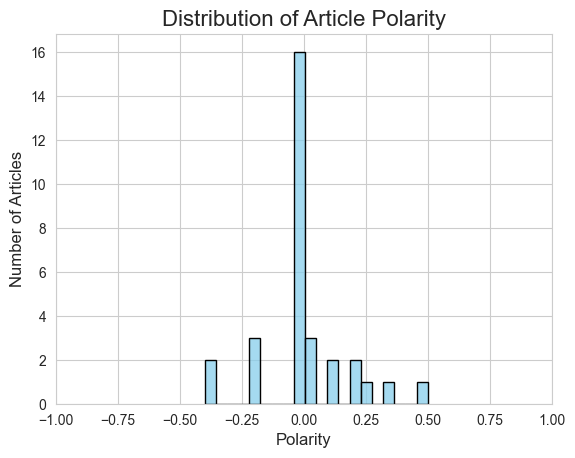

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

sns.histplot(df_transformed['polarity'], 
             bins=20, 
             color='skyblue', 
             edgecolor='black')

plt.xlim(-1, 1)
plt.title('Distribution of Article Polarity', fontsize=16)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.show()